William Lee / BMI-2005 / Homework 1

In [5]:
import os
path = "/Users/williamlee/Desktop/BMI2005_Algorithms_2020"
os.chdir(path)

In [6]:
# 1a)
def naive_lj(r,s=1,e=1):
  return 4*e*(((s/r)**12) - ((s/r)**6))

In [ ]:
"""
1b)

1) start with efficient equation

-4*e*u*(1 - u)

2) u ← z**3

-4*e*(z**3)*(1 - (z**3))

3) z ← (s**2)/(r**2)

-4*e*(((s**2)/(r**2))**3)*(1 - (((s**2)/(r**2))**3))

4) simplify equation (multiply powers)

-4*e*((s**6)/(r**6))*(1 - ((s**6)/(r**6)))

5) simplify equation (distribute (s**6)/(r**6))

-4*e*(((s**6)/(r**6)) - ((s**12)/(r**12)))

6) distribute the negative sign

4*e*(-((s**6)/(r**6)) + ((s**12)/(r**12)))

7) reorder terms; original LJ function recovered

4*e*(((s/r)**12) - ((s/r)**6))
"""

In [7]:
# 1c)

def LJPOTENTIAL(r,s,e):
    r2 = r*r
    s2 = s*s
    z = s2/r2
    u = z**3
    return -4*e*u*(1 - u)

"""
# naive_lj(r,s,e) (naive function) arithmetic operations:
1. r**12
2. r**6
3. s**12
4. s**6
5. 4*e
6. s**12/r**12
7. s**6/r**6
8. (s**12/r**12) - (s**6/r**6)
9. 4*e*((s**12/r**12) - (s**6/r**6))
# naive_lj(r,s,e) (naive function) assignment operations:
none
### TOTAL OPERATIONS: 9

# LJPOTENTIAL(r,s,e) (efficient function) arithmetic operations:
1. r*r
2. s*s
3. s2/r2
4. z**3
5. 1 - u
6. -4*e
7. -4*e*u
8. -4*e*u*(1 - u)
# LJPOTENTIAL(r,s,e) (efficient function) assignment operations:
1. r2 = r*r
2. s2 = s*s
3. z = s2/r2
4. u = z**3
### TOTAL OPERATIONS: 12

Interpretation: considering that the naive function has 9 total arithmetic
operations and that the efficient has 8, we might expect the latter to
be marginally faster (but for both to ultimately yield the same result).
However, it is worth noting that the efficient function does have a greater
number of total operations (arithmetic + assignment).
"""

'\n# naive_lj(r,s,e) (naive function) arithmetic operations:\n1. r**12\n2. r**6\n3. s**12\n4. s**6\n5. 4*e\n6. s**12/r**12\n7. s**6/r**6\n8. (s**12/r**12) - (s**6/r**6)\n9. 4*e*((s**12/r**12) - (s**6/r**6))\n# naive_lj(r,s,e) (naive function) assignment operations:\nnone\n### TOTAL OPERATIONS: 9\n\n# LJPOTENTIAL(r,s,e) (efficient function) arithmetic operations:\n1. r*r\n2. s*s\n3. s2/r2\n4. z**3\n5. 1 - u\n6. -4*e\n7. -4*e*u\n8. -4*e*u*(1 - u)\n# LJPOTENTIAL(r,s,e) (efficient function) assignment operations:\n1. r2 = r*r\n2. s2 = s*s\n3. z = s2/r2\n4. u = z**3\n### TOTAL OPERATIONS: 12\n\nInterpretation: considering that the naive function has 9 total arithmetic\noperations and that the efficient has 8, we might expect the latter to\nbe marginally faster (but for both to ultimately yield the same result).\nHowever, it is worth noting that the efficient function does have a greater\nnumber of total operations (arithmetic + assignment).\n'

In [8]:
# 1d)
import time
# value of r is arbitrary here
r = 2

# measures naive runtime, r=2
init = time.perf_counter()
naive_lj(r,1,1)
fin = time.perf_counter()
time_in_sec = fin - init
print("naive runtime: ", time_in_sec)

# measures efficient runtime, r=2
init = time.perf_counter()
LJPOTENTIAL(r,1,1)
fin = time.perf_counter()
time_in_sec = fin - init
print("efficient runtime: ", time_in_sec)

"""
As expected the efficient algorithm has a consistently faster runtime
(though the difference is extremely small). It uses a smaller number of 
arithmetic operations, so logically this makes sense. 
"""

naive runtime:  6.14819999995575e-05
efficient runtime:  5.62760000022422e-05


'\nAs expected the efficient algorithm has a consistently faster runtime\n(though the difference is extremely small). It uses a smaller number of \narithmetic operations, so logically this makes sense. \n'

In [11]:
# 2a)
import numpy as np

xyz_0003 = "lj-0003.xyz"
xyz_0200 = "lj-0200.xyz"
xyz_0500 = "lj-0500.xyz"
xyz_1000 = "lj-1000.xyz"

def xyz_reader(xyz_file):

    position = []
    with open(xyz_file, "r") as xyz:
        l_cnt = 0
        for line in xyz:
            l_cnt += 1
            if l_cnt <=2:
                continue
            else:
                xyz_pos = line.split()
                xyz_pos.pop(0)
                position.append(xyz_pos)
    
    pos_array = np.array(position, dtype="float32")
    return pos_array

In [12]:
# 2b)
position_0003 = xyz_reader(xyz_0003)
print("3-atom position array:\n",position_0003)

position_0200 = xyz_reader(xyz_0200)
print("200-atom position array:\n",position_0200)

position_0500 = xyz_reader(xyz_0500)
print("500-atom position array:\n",position_0500)

position_1000 = xyz_reader(xyz_1000)
print("1000-atom position array:\n",position_1000)

3-atom position array:
 [[ 0.5391357  -0.518508    0.07937232]
 [ 0.11065882  0.4850176  -0.49567643]
 [-0.4635602   0.05370848  0.5098517 ]]
200-atom position array:
 [[-3.657420e-01 -1.434236e+00  1.086713e+00]
 [ 1.758085e+00 -2.733505e+00 -4.553970e-01]
 [-2.777260e+00  8.659730e-01 -9.788090e-01]
 [-8.509290e-01  8.053680e-01 -1.050607e+00]
 [ 4.697280e-01 -1.262455e+00  1.770134e+00]
 [ 1.776954e+00  2.284919e+00  2.691217e+00]
 [ 1.564369e+00  2.100387e+00 -3.898060e-01]
 [ 2.153646e+00  1.233546e+00  1.145661e+00]
 [ 2.373994e+00  2.372510e+00  1.522204e+00]
 [-3.883020e-01 -2.295452e+00 -2.280274e+00]
 [ 3.075270e-01 -2.482761e+00  3.009565e+00]
 [-2.300226e+00  1.953750e-01 -2.845240e+00]
 [ 1.437510e-01  2.302608e+00 -1.036652e+00]
 [-8.150650e-01  2.285127e+00  2.228309e+00]
 [-5.325050e-01 -2.077966e+00 -2.126230e-01]
 [-2.505161e+00 -2.032122e+00  3.956170e-01]
 [ 2.298553e+00 -1.556703e+00  7.257640e-01]
 [-9.271460e-01  1.175015e+00 -2.089625e+00]
 [-1.088581e+00 -2.306

3a.
To find the total number of pairwise potential energy calculations
for n particles, we can use the n choose k (i.e., combination) formula. As we
are interested in pairs, we can set k = 2. When we do this, the formula 
simplifies to n(n-1)/2.

In [ ]:
# 3b)
def system_energy(xyz_file):

    position = []
    with open(xyz_file, "r") as xyz:
        l_cnt = 0
        for line in xyz:
            l_cnt += 1
            if l_cnt <=2:
                continue
            else:
                xyz_pos = line.split()
                xyz_pos.pop(0)
                position.append(xyz_pos)
    
    pos_array = np.array(position, dtype="float32")

    system_energy = 0
    i = 0 # counter
    len_array = len(pos_array)
    
    for a in pos_array:
        i += 1
        for index in range(i,len_array):
            b = pos_array[index,:]
            distance = ((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2)**(1/2)
            system_energy += naive_lj(distance,1,1)
        
    return system_energy

print("Energy of 3-atom system:",system_energy(xyz_0003))
print("Energy of 200-atom system:",system_energy(xyz_0200))
print("Energy of 500-atom system:",system_energy(xyz_0500))
print("Energy of 1000-atom system:",system_energy(xyz_1000))

Energy of 3-atom system: -2.437910550387346
Energy of 200-atom system: -799.6247840691689
Energy of 500-atom system: -3315.986632752494


In [8]:
# 4a)
def naive_system_energy(xyz_file, cutoff=1):

    position = []
    with open(xyz_file, "r") as xyz:
        l_cnt = 0
        for line in xyz:
            l_cnt += 1
            if l_cnt <=2:
                continue
            else:
                xyz_pos = line.split()
                xyz_pos.pop(0)
                position.append(xyz_pos)
    
    pos_array = np.array(position, dtype="float32")

    system_energy = 0
    i = 0 # counter
    len_array = len(pos_array)
    
    for a in pos_array:
        i += 1
        for index in range(i,len_array):
            b = pos_array[index,:]
            distance = ((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2)**(1/2)
            
            if distance <= cutoff:
                system_energy += naive_lj(distance,1,1)
        
    return system_energy

print("Energy of 3-atom system:",naive_system_energy(xyz_0003))
print("Energy of 200-atom system:",naive_system_energy(xyz_0200))
print("Energy of 500-atom system:",naive_system_energy(xyz_0500))
print("Energy of 1000-atom system:",naive_system_energy(xyz_1000))

"""
This is a nonsensical cutoff. We know that when all the atoms in these systems are
taken into the account, their energies should be negative values. However, when a 
cutoff of 1 is used, their energies are all positive (except for the 3-atom
system, which has an energy of 0). 
"""

Energy of 3-atom system: 0
Energy of 200-atom system: 37.83056611346621
Energy of 500-atom system: 30.564357266063986
Energy of 1000-atom system: 58.50723995135499


'\nThis is a nonsensical cutoff. We know that when all the atoms in these systems are\ntaken into the account, their energies should be negative values. However, when a \ncutoff of 1 is used, their energies are all positive (except for the 3-atom\nsystem, which has an energy of 0). \n'

In [9]:
# 4b)
diff_cutoffs = np.linspace(0.5, 5, num=46)
plot_data = []
for value in diff_cutoffs:
    sys_energy = naive_system_energy(xyz_1000, value)
    plot_point = (value, sys_energy)
    plot_data.append(plot_point)
    
plot_data_np = np.array(plot_data, dtype="float32")
    
import matplotlib.pyplot as plt

plt.figure()
plt.title("Energy of 1000-atom System vs. Cutoff")
plt.xlabel("Cutoff")
plt.ylabel("Energy of System")

plt.scatter(plot_data_np[:,0], plot_data_np[:,1])

plt.show();

"""
Looking at the plot, it appears that 3 might be a good cutoff (any decreases
in the magnitude of the system's energy are very slight past this cutoff). From
the numpy array plot_data_np, we can see that the exact energy of the system at 
cutoff = 3 is -6867.94. We already know that the energy of the system without
a cutoff is -7017.923488258043, so a cutoff of 3 preserves ~ 97.86% 
((6867.94/7017.92)*100) of the maximum/total energy of the system.
"""

<Figure size 640x480 with 1 Axes>

"\nLooking at the plot, it appears that 3 might be a good cutoff (any decreases\nin the magnitude of the system's energy are very slight past this cutoff). From\nthe numpy array plot_data_np, we can see that the exact energy of the system at \ncutoff = 3 is -6867.94. We already know that the energy of the system without\na cutoff is -7017.923488258043, so a cutoff of 3 preserves ~ 97.86% \n((6867.94/7017.92)*100) of the maximum/total energy of the system.\n"

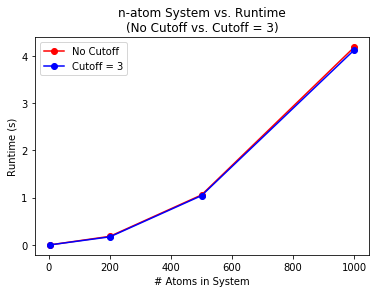

"\nAs can be seen from the plot, runtime is hardly affected by the cutoff we set;\nwe have not solved the N**2 scaling problem. This is to be expected, however,\nas we have not actually changed the algorithm in any fundamental way: it still\nhas to calculate the distance between every pair of atoms in the system. As a \nresult, the scaling of the problem hasn't really changed.\n"

In [10]:
# 4c)
total_energy = []

init = time.perf_counter()
naive_system_energy(xyz_0003, 3)
fin = time.perf_counter()
time_in_sec = fin - init
plot_point = (3, time_in_sec)
total_energy.append(plot_point)

init = time.perf_counter()
naive_system_energy(xyz_0200, 3)
fin = time.perf_counter()
time_in_sec = fin - init
plot_point = (200, time_in_sec)
total_energy.append(plot_point)

init = time.perf_counter()
naive_system_energy(xyz_0500, 3)
fin = time.perf_counter()
time_in_sec = fin - init
plot_point = (500, time_in_sec)
total_energy.append(plot_point)

init = time.perf_counter()
naive_system_energy(xyz_1000, 3)
fin = time.perf_counter()
time_in_sec = fin - init
plot_point = (1000, time_in_sec)
total_energy.append(plot_point)

total_energy_np = np.array(total_energy, dtype="float32")

###

cutoff_energy = []

init = time.perf_counter()
naive_system_energy(xyz_0003, 3)
fin = time.perf_counter()
time_in_sec = fin - init
plot_point = (3, time_in_sec)
cutoff_energy.append(plot_point)

init = time.perf_counter()
naive_system_energy(xyz_0200, 3)
fin = time.perf_counter()
time_in_sec = fin - init
plot_point = (200, time_in_sec)
cutoff_energy.append(plot_point)

init = time.perf_counter()
naive_system_energy(xyz_0500, 3)
fin = time.perf_counter()
time_in_sec = fin - init
plot_point = (500, time_in_sec)
cutoff_energy.append(plot_point)

init = time.perf_counter()
naive_system_energy(xyz_1000, 3)
fin = time.perf_counter()
time_in_sec = fin - init
plot_point = (1000, time_in_sec)
cutoff_energy.append(plot_point)

cutoff_energy_np = np.array(cutoff_energy, dtype="float32")

###

plt.figure()
plt.title("n-atom System vs. Runtime\n(No Cutoff vs. Cutoff = 3)")
plt.xlabel("# Atoms in System")
plt.ylabel("Runtime (s)")

plt.plot(total_energy_np[:,0], total_energy_np[:,1], marker='o', color='r')
plt.plot(cutoff_energy_np[:,0], cutoff_energy_np[:,1], marker='o', color='b')

plt.legend(["No Cutoff","Cutoff = 3"], loc='best')

plt.show();

"""
As can be seen from the plot, runtime is hardly affected by the cutoff we set;
we have not solved the N**2 scaling problem. This is to be expected, however,
as we have not actually changed the algorithm in any fundamental way: it still
has to calculate the distance between every pair of atoms in the system. As a 
result, the scaling of the problem hasn't really changed.
"""

In [ ]:
"""
5a) N

5b) 1

5c) 1

5d) 2N**3

5e) 1

5f) 2

5g) 1
"""

In [ ]:
"""
6a. N

6b. N

6c. N*log(N)
"""

In [ ]:
"""
7)

-- Let's look at what we currently have:

f(No) = T

f(No*2) = T*2**b

-- so, we can see that f(No) is a special case.
   We can ask ourselves the question, "Where is
   the 2**b factor when N = No?"

-- well, let's try changing what's inside "f()"
   and seeing how we can manipulate the right
   side of the equation. Knowing that this is 
   doubling test, we can only really multiply
   No by 2**x (where x represents whole numbers).
   We'll start with x = 2:
   
   f(No*(2**2)) = T*(2**(b))**2 = T*2**(b*2)
   
-- interesting. Let's try x = 3:
   f(No*(2**3)) = T*(2**(b))**3 = T*2**(b*3)
   
-- Ok, so we can see that the term multiplied by b
   (depending on what the value on x is) can be 
   thought of as the result of N/No. So for when N
   = No (i.e., in the case "f(No) = T" we initially
   saw) - if the term multiplied by b is N/No - the factor
   2**b would still be there (it would be 2**(b*1), or
   just 2**b). However, this is not the case. Therefore,
   the term multiplied by b must actually be (N/No) - 1, so that
   when N = No, the 2**b facto disappears (which it would if 
   the term multiplied by b is 0). Therefore, we know the general
   formula for f(N) must be:
   
   f(N) = 2**(b*((N/No) - 1))*T
   """

In [11]:
# 8a)
# based on pseduocode, i is an list that is appended to
# define i as empty list before "for" loop
# c is a vector of denomination values
# c must be ordered from greatest to least
# none-whole numbers potentially returned unless floor division used
def BETTERCHANGE(M,c,d):
    i = []
    c.sort(reverse=True)
    r = M
    for k in range(d):
        i.append(r//c[k])
        r = r - c[k]*i[k]
    return i

In [12]:
# 8b)
print(BETTERCHANGE(79,[1,3,9],3))

[8, 2, 1]


In [ ]:
"""
8c)

The runtime of BETTERCHANGE is directly related to the size of d (as the
size of d determines how many times the function passes through its "for" loop).
While the order of growth of the runtime is O(n), in this case one could argue 
that BETTERCHANGE's runtime order of growth could also be represented as O(d).

Compared to d, M and c have a negligable effect on BETTERCHANGE's runtime order of growth.
"""

In [13]:
# 8d)
# correct case (right amount of change returned in most efficient way):
print(BETTERCHANGE(81,[1,5,10],3))
# 81 == 81

[8, 0, 1]


In [14]:
# 8e)
# incorrect case (wrong amount of change returned):
print(BETTERCHANGE(55,[2,7,13],3))
# 55 != 54

[4, 0, 1]


In [15]:
# 9a)
def harmonic(n):
    y = 0
    for i in range(1,n+1):
        x = 1/i
        y += x
    return y

In [16]:
# 9b)
def coupon(n):
    i = []
    while len(np.unique(i)) < n:
        randVal = np.random.randint(0,n)
        i.append(randVal)
    num_val = len(i)
    return (num_val, n)

In [17]:
# 9c)
def coupon_sim(n):
    sim_total = 0
    for _ in range(100):
        sim_total += coupon(n)[0]
    sim_avg = sim_total/100
    return (sim_avg, n)

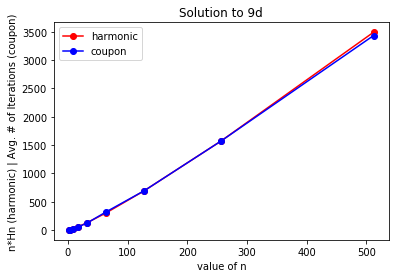

In [18]:
# 9d)
def doubling_test(n, n_max):
    harmonic_data = []
    coupon_s_data = []
    while n <= n_max: 
        harmonic_data.append((n, n*harmonic(n)))
        coupon_s_data.append((n, coupon_sim(n)[0]))
        n *= 2
    harmonic_np = np.array(harmonic_data)
    coupon_s_np = np.array(coupon_s_data)
    return (harmonic_np, coupon_s_np)

func_ret = doubling_test(2, 1000)
harmonic_plot = func_ret[0]
coupon_s_plot = func_ret[1]

plt.figure()
plt.title("Solution to 9d")
plt.xlabel("value of n")
plt.ylabel("n*Hn (harmonic) | Avg. # of Iterations (coupon)")

plt.plot(harmonic_plot[:,0], harmonic_plot[:,1], marker='o', color='r')
plt.plot(coupon_s_plot[:,0], coupon_s_plot[:,1], marker='o', color='b')

plt.legend(["harmonic","coupon"], loc='best')

plt.show();